In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [33]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
df['GRE Score'].min()

np.int64(290)

In [35]:
df[df['CGPA']>8.0]['Chance of Admit '].min()

np.float64(0.34)

In [36]:
df[df['GRE Score'] >=310]['Chance of Admit '].min()

np.float64(0.39)

In [37]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [39]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

        GRE Scores ( out of 340 )
        TOEFL Scores ( out of 120 )
        University Rating ( out of 5 )
        Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
        Undergraduate GPA ( out of 10 )
        Research Experience ( either 0 or 1 )
        Chance of Admit ( ranging from 0 to 1 )

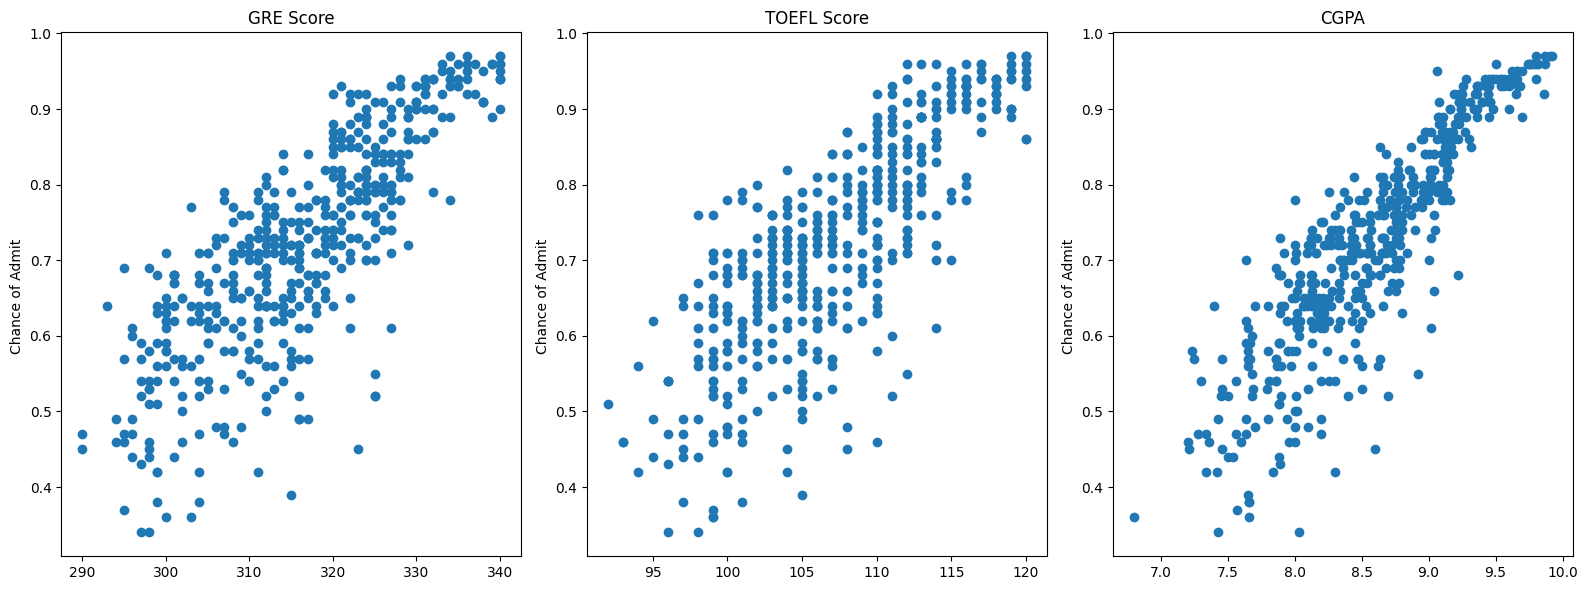

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))


axes[0].plot(df['GRE Score'], df['Chance of Admit '], 'o')
axes[0].set_ylabel("Chance of Admit ")
axes[0].set_title("GRE Score")

axes[1].plot(df['TOEFL Score'], df['Chance of Admit '], 'o')
axes[1].set_title("TOEFL Score")
axes[1].set_ylabel("Chance of Admit ")

axes[2].plot(df['CGPA'], df['Chance of Admit '], 'o')
axes[2].set_title("CGPA")
axes[2].set_ylabel("Chance of Admit ")


plt.tight_layout()


In [41]:
# help(sns.regplot)

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

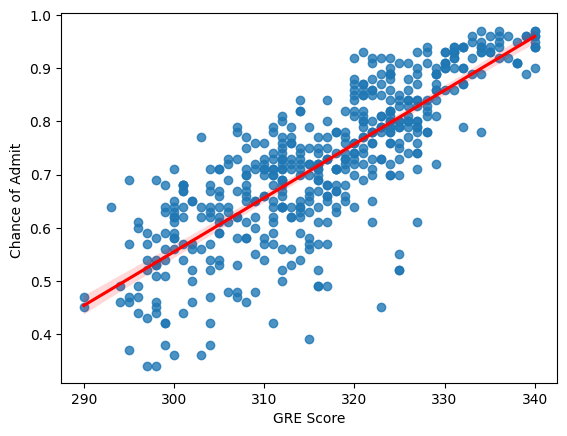

In [42]:
sns.regplot(data=df, x='GRE Score', y='Chance of Admit ', line_kws=dict(color="r"))

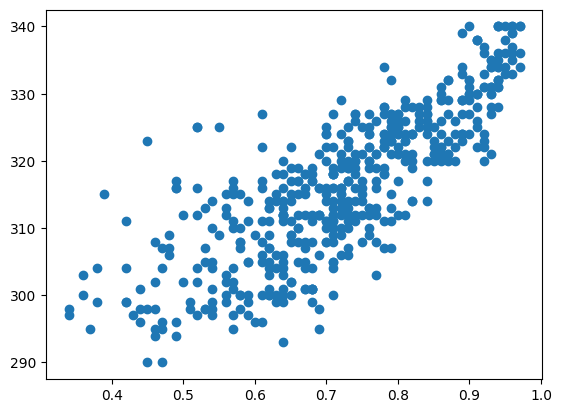

In [43]:
plt.scatter(y=df['GRE Score'], x=df['Chance of Admit '])

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

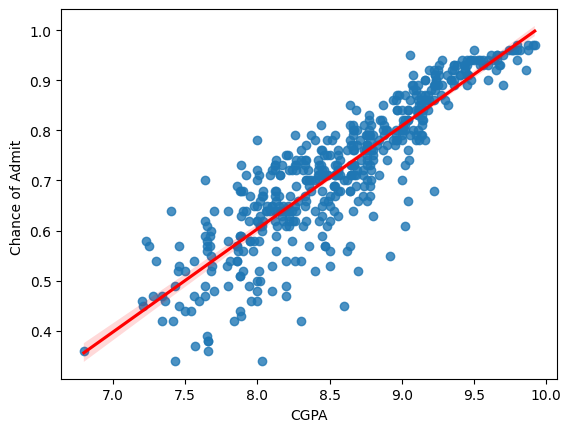

In [44]:
sns.regplot(data=df, x='CGPA', y='Chance of Admit ', line_kws=dict(color="r"))

<Axes: >

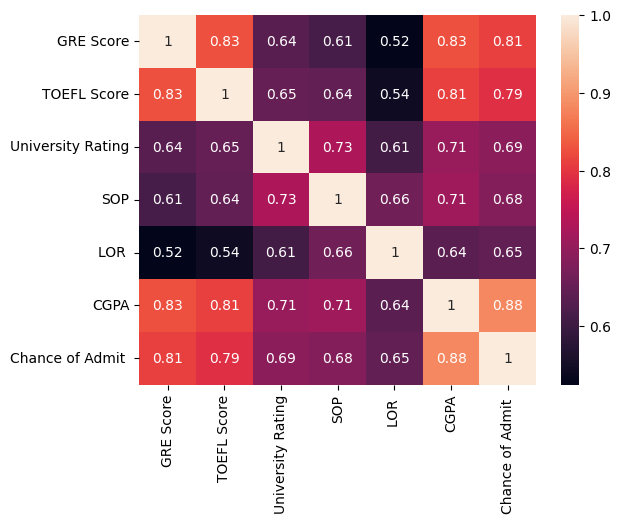

In [45]:
sns.heatmap(df.drop(['Serial No.', 'Research'], axis=1).corr(), annot=True)

In [46]:
X = df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
# help(train_test_split)

In [49]:
lr_model = LinearRegression()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
scaler = StandardScaler()

In [52]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [53]:
lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [54]:
preds = lr_model.predict(scaled_X_test)

In [55]:
mean_absolute_error(y_test, preds)

np.float64(0.04396863063294705)

In [56]:
np.sqrt(mean_squared_error(y_test, preds))

np.float64(0.06136605787480697)

In [57]:
np.sqrt(mean_squared_error(y_test, preds))

np.float64(0.06136605787480697)

In [58]:
r2_score(y_test, preds)

0.7767101021347024

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [60]:
def model_performance(model):
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)

    print(f"The mean absolute error: {mae} \n")

    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"The root mean squared error: {rmse} \n")

    mse = mean_squared_error(y_test, preds)

    print(f"The mean squared error: {mse} \n")

    r2score = r2_score(y_test, preds)

    print(f"The R2_score of the model is: {r2score}")

In [61]:
model2 = DecisionTreeRegressor()

In [79]:
# help(DecisionTreeRegressor)

In [62]:
model_performance(model2)

The mean absolute error: 0.060899999999999996 

The root mean squared error: 0.08245604889879213 

The mean squared error: 0.006798999999999999 

The R2_score of the model is: 0.5968583531376148


In [63]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model2.feature_importances_}).sort_values('importance', ascending=False)

feature_importance

,feature,importance
5,CGPA,0.832343
0,GRE Score,0.073834
1,TOEFL Score,0.037718
4,LOR,0.020443
3,SOP,0.018132
2,University Rating,0.011680
6,Research,0.005850


In [71]:
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

In [72]:
# help(RandomForestRegressor)

In [73]:
model_performance(model3)

The mean absolute error: 0.04942900000000003 

The root mean squared error: 0.06730551017561641 

The mean squared error: 0.004530031700000004 

The R2_score of the model is: 0.7313951404799511


Seems like the Random Forest Regressor is the best model for this.

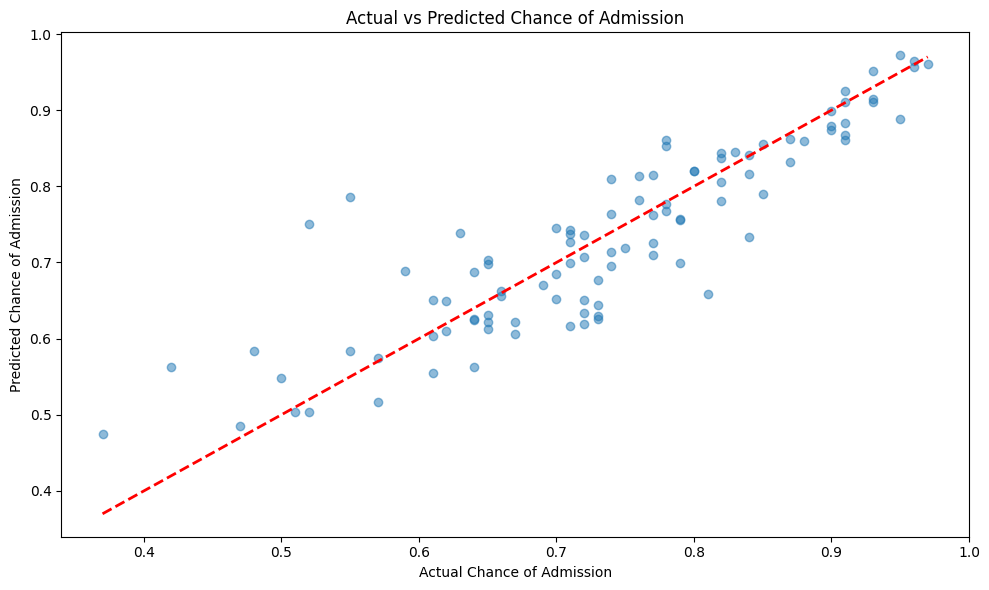

In [74]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")
plt.title("Actual vs Predicted Chance of Admission")
plt.tight_layout()
plt.show()

In [75]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model3.feature_importances_
}).sort_values('importance', ascending=False)

In [76]:
feature_importance

,feature,importance
5,CGPA,0.705254
0,GRE Score,0.191989
1,TOEFL Score,0.036848
3,SOP,0.025909
4,LOR,0.020589
2,University Rating,0.011602
6,Research,0.007809


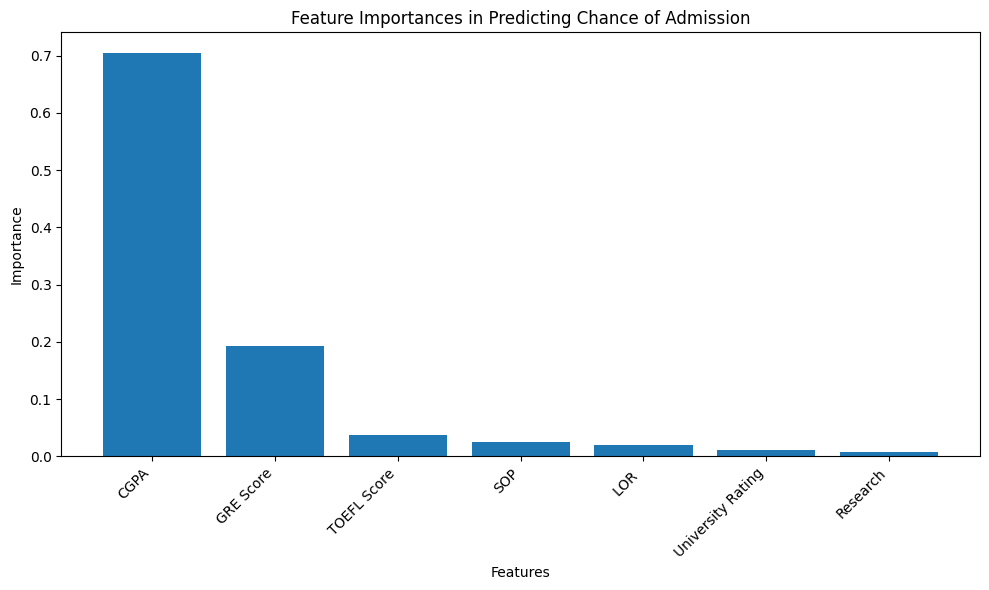

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances in Predicting Chance of Admission")
plt.tight_layout()
plt.show()

These results suggest that academic performance (as measured by CGPA) and standardized test scores (particularly GRE) are the most crucial factors in determining the chance of admission.
